 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
# Reading whale returns
file_path = Path("../Starter_Code/Resources/whale_returns.csv")
whale_df = pd.read_csv(file_path, index_col="Date", parse_dates=True)
whale_df = whale_df.sort_index()

whale_df.head(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739
2015-03-11,0.004012,0.005163,0.003312,-0.001147
2015-03-12,0.008265,0.010272,0.013117,0.010801


In [3]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_df = whale_df.dropna().copy()
whale_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [5]:
# Reading algorithmic returns
file_path = Path("../Starter_Code/Resources/algo_returns.csv")
algo_df = pd.read_csv(file_path, index_col="Date", parse_dates=True)
algo_df = algo_df.sort_index()

algo_df.head(10)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
2014-06-04,-0.001838,NaN
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668


In [6]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_df = algo_df.dropna().copy()
algo_df

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P TSX 60 Closing Prices
file_path = Path("../Starter_Code/Resources/sp_tsx_history.csv")
tsx_df = pd.read_csv(file_path, index_col="Date", parse_dates=True)
tsx_df = tsx_df.sort_index()
tsx_df.head(10)

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"
2012-10-09,"$12,273.57"
2012-10-10,"$12,212.42"
2012-10-11,"$12,233.95"
2012-10-12,"$12,202.04"


In [9]:
# Check Data Types
tsx_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
tsx_df["Close"] = tsx_df["Close"].str.replace("$", "").str.replace(",", "")

tsx_df["Close"] = tsx_df["Close"].astype("float")

tsx_df.head()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [11]:
# Calculate Daily Returns
tsx_daily_return = tsx_df.pct_change()
tsx_daily_return.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [12]:
# Drop nulls
tsx_df = tsx_df.dropna().copy()
tsx_df

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99
...,...
2019-12-20,17118.44
2019-12-23,17128.71
2019-12-24,17180.15


In [13]:
# Rename `Close` Column to be specific to this portfolio.

tsx_daily_return.columns = ["TSX 60"]
tsx_daily_return.head()

,TSX 60
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_df, algo_df, tsx_daily_return], axis = "columns", join = "inner")
combined_df.head() 

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX 60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Portfolio Daily Returns'}, xlabel='Date'>

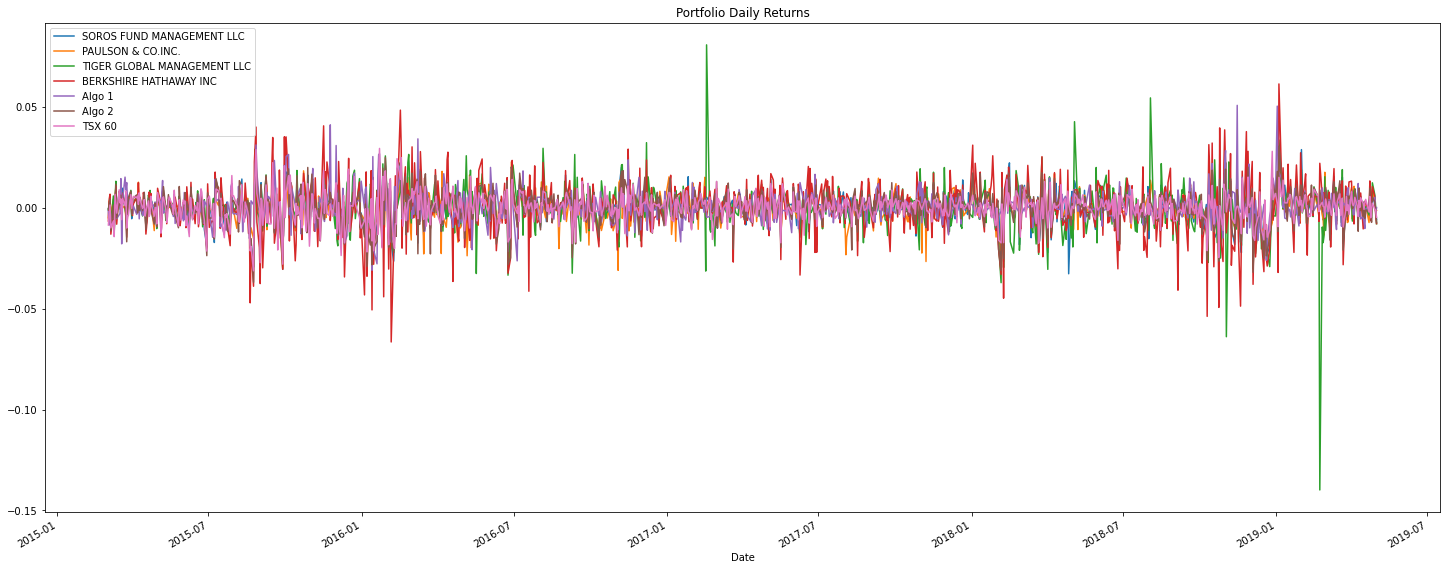

In [15]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(25,10), title="Portfolio Daily Returns")

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Portfolio Cumulative Returns'}, xlabel='Date'>

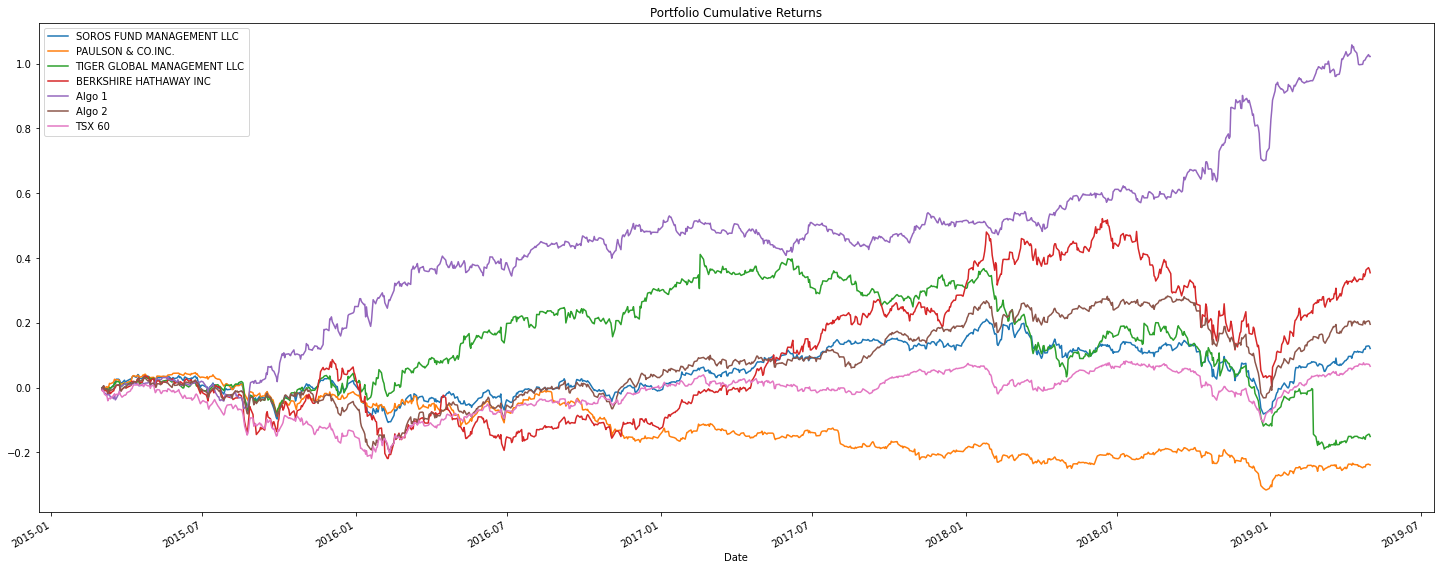

In [16]:
# Calculate cumulative returns of all portfolios

cumulative_returns = (1 + combined_df).cumprod() -1

# Plot cumulative returns

cumulative_returns.plot(figsize=(25,10), title="Portfolio Cumulative Returns")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Portfolio Risk'}>

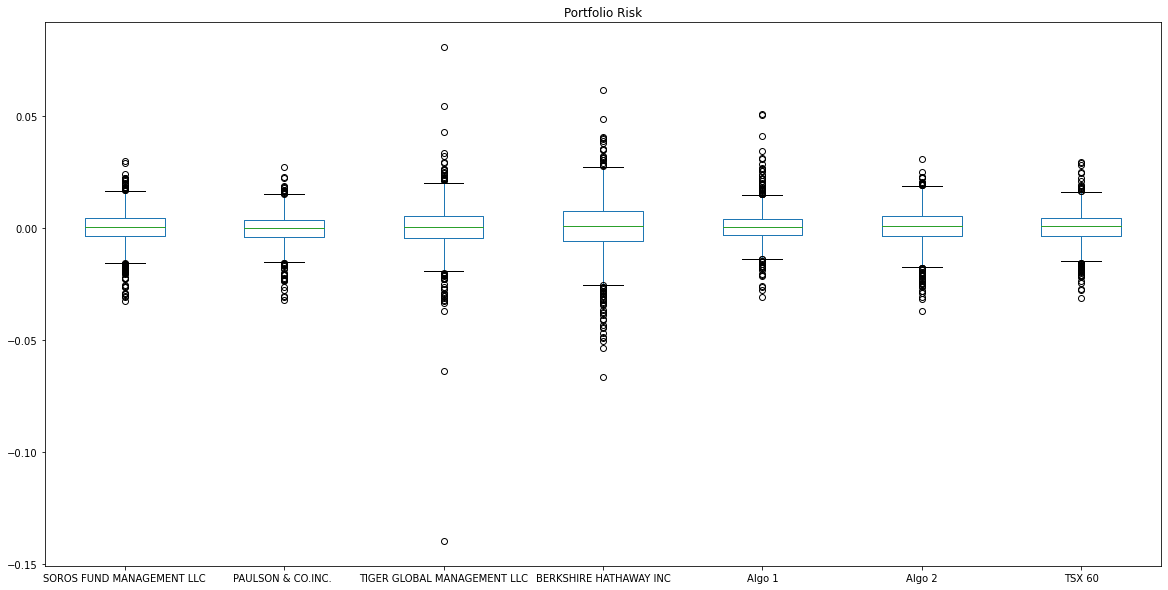

In [17]:
# Box plot to visually show risk

combined_df.plot.box(figsize = (20,10), title="Portfolio Risk")

### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios
daily_std = combined_df.std()
print(daily_std)

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
TSX 60                         0.007034
dtype: float64


### Determine which portfolios are riskier than the S&P TSX 60

In [19]:
# Calculate  the daily standard deviation of S&P TSX 60

# The daily standard deviation of the S&P TSX 60 is calculated in the cell above.  It is 0.007034. 

# Determine which portfolios are riskier than the S&P TSX 60

high_risk = daily_std[daily_std > daily_std["TSX 60"]]
print(high_risk)


SOROS FUND MANAGEMENT LLC      0.007828
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
dtype: float64


### Calculate the Annualized Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days)
volatility = combined_df.std() * np.sqrt(252)
volatility = volatility.sort_values()
volatility

PAULSON & CO.INC.              0.110841
TSX 60                         0.111664
Algo 1                         0.120470
SOROS FUND MANAGEMENT LLC      0.124259
Algo 2                         0.132177
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P TSX 60 using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling Standard Deviation in 21 Day Window'}, xlabel='Date'>

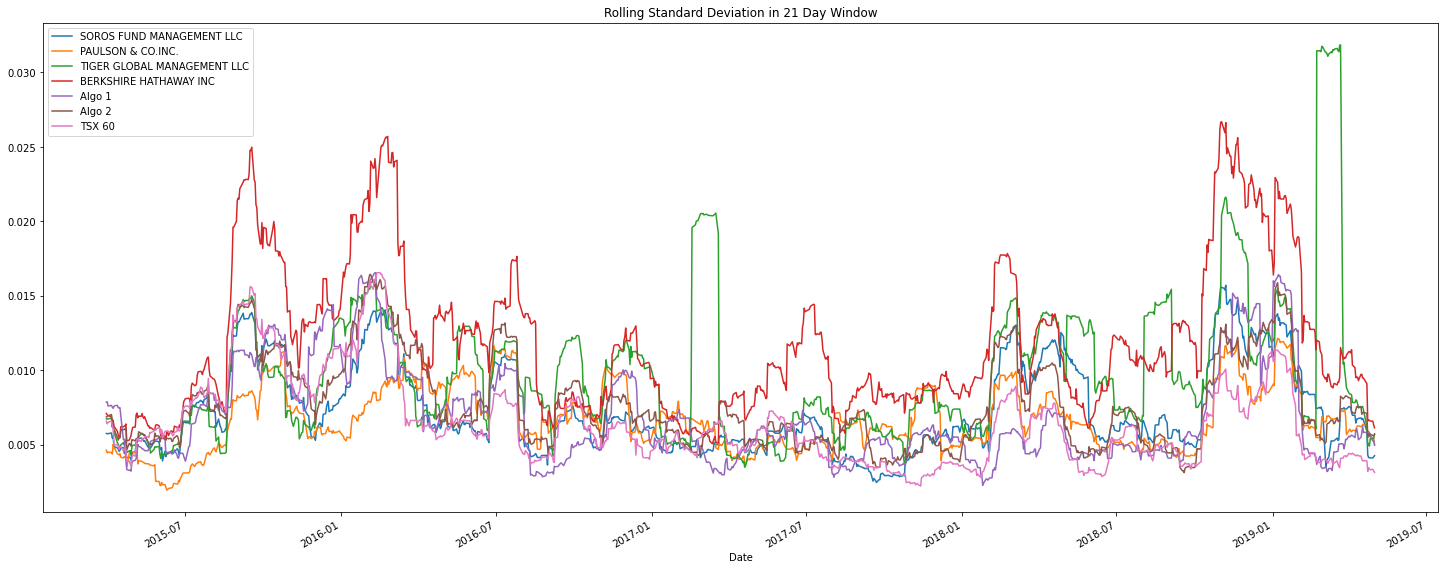

In [21]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

rolling_std = combined_df.rolling(window=21).std()

# Plot the rolling standard deviation

rolling_std.plot(figsize=(25,10), title="Rolling Standard Deviation in 21 Day Window")

### Calculate and plot the correlation

<AxesSubplot:>

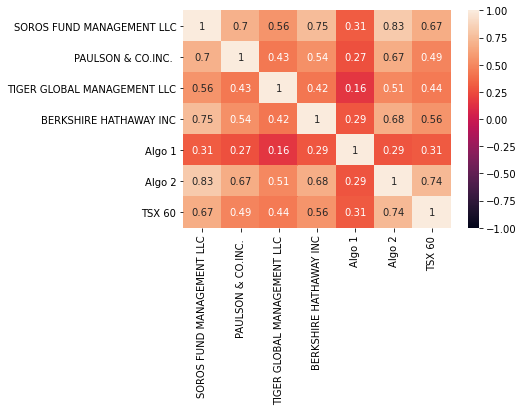

In [22]:
# Calculate the correlation

correlation = combined_df.corr()
correlation

# Display de correlation matrix

sns.heatmap(correlation, vmin=-1, vmax=1, annot=True)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:title={'center':'Algo 2 Rolling Beta'}, xlabel='Date'>

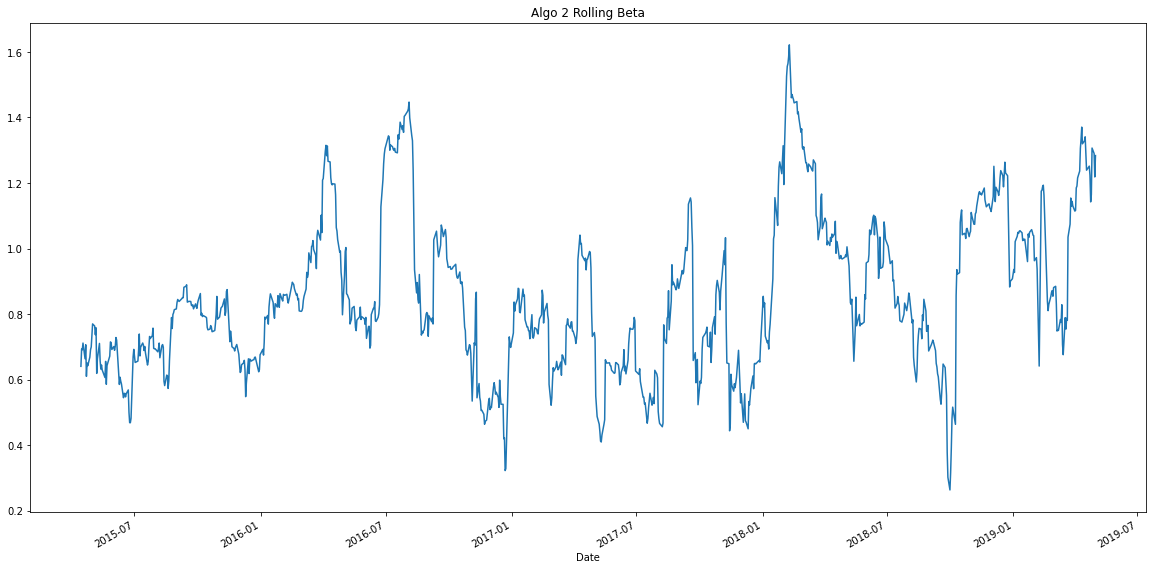

In [23]:
# Calculate covariance of a single portfolio

algo_two_covariance = combined_df["Algo 2"].rolling(window=30).cov(combined_df["TSX 60"])

# Calculate variance of S&P TSX

variance = combined_df["TSX 60"].rolling(window=30).var()

# Computing beta

algo_two_beta = algo_two_covariance / variance

# Plot beta trend

algo_two_beta.plot(figsize=(20,10), title="Algo 2 Rolling Beta")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [24]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [25]:
# Annualized Sharpe Ratios

sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios.sort_values()


PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
TSX 60                         0.195550
SOROS FUND MANAGEMENT LLC      0.286709
Algo 2                         0.396817
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

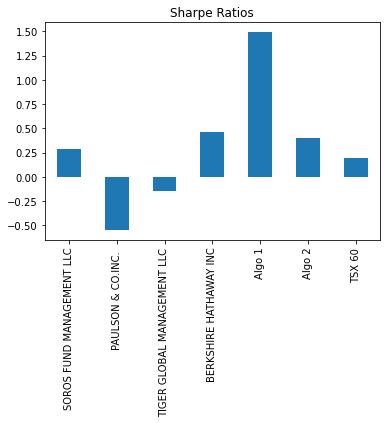

In [26]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [27]:
# Reading data from 1st stock
file_path = Path("../Starter_Code/Resources/Penn.csv")
penn_df = pd.read_csv(file_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
penn_df.columns = ["PENN"]
penn_df.head(10)

,PENN
Date,
2018-01-02 16:00:00,30.74
2018-01-03 16:00:00,30.33
2018-01-04 16:00:00,30.31
2018-01-05 16:00:00,30.79
2018-01-08 16:00:00,30.79
2018-01-09 16:00:00,31.01
2018-01-10 16:00:00,31.00
2018-01-11 16:00:00,32.22
2018-01-12 16:00:00,32.11


In [28]:
# Reading data from 2nd stock
file_path = Path("../Starter_Code/Resources/Dkng.csv")
dkng_df = pd.read_csv(file_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
dkng_df.columns = ["DKNG"]
dkng_df.head(10)

,DKNG
Date,
2019-07-25 16:00:00,9.80
2019-08-07 16:00:00,9.76
2019-08-13 16:00:00,9.78
2019-08-20 16:00:00,9.85
2019-08-27 16:00:00,9.85
2019-08-28 16:00:00,9.85
2019-09-18 16:00:00,9.90
2019-09-20 16:00:00,9.85
2019-09-24 16:00:00,9.85


In [29]:
# Reading data from 3rd stock
file_path = Path("../Starter_Code/Resources/Scr.csv")
scr_df = pd.read_csv(file_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
scr_df.columns = ["SCR"]
scr_df.head(10)

,SCR
Date,
2018-01-04 16:00:00,1.29
2018-01-10 16:00:00,1.23
2018-02-22 16:00:00,1.03
2018-03-13 16:00:00,1.07
2018-03-16 16:00:00,0.94
2018-03-23 16:00:00,0.97
2018-03-26 16:00:00,1.00
2018-04-11 16:00:00,1.06
2018-04-13 16:00:00,1.20


In [30]:
# Combine all stocks in a single DataFrame
betting_df = pd.concat([penn_df, dkng_df, scr_df], axis = "columns", join = "inner")
betting_df.head() 

,PENN,DKNG,SCR
Date,,,
2019-07-25 16:00:00,18.87,9.80,2.91
2019-08-07 16:00:00,17.70,9.76,3.86
2019-08-20 16:00:00,18.50,9.85,4.90
2019-08-27 16:00:00,17.92,9.85,4.77
2019-08-28 16:00:00,18.31,9.85,4.63


In [31]:
# Calculate daily returns

# Drop NAs

# Display sample data

betting_df.dropna()
betting_df
betting_daily_returns = betting_df.pct_change()
betting_daily_returns.dropna(inplace=True)
betting_daily_returns.head(10)


,PENN,DKNG,SCR
Date,,,
2019-08-07 16:00:00,-0.062003,-0.004082,0.326460
2019-08-20 16:00:00,0.045198,0.009221,0.269430
2019-08-27 16:00:00,-0.031351,0.000000,-0.026531
2019-08-28 16:00:00,0.021763,0.000000,-0.029350
2019-09-18 16:00:00,0.095576,0.005076,0.144708
2019-09-20 16:00:00,-0.014955,-0.005051,0.000000
2019-09-24 16:00:00,-0.028846,0.000000,-0.018868
2019-09-26 16:00:00,-0.009901,0.000000,-0.009615
2019-10-01 16:00:00,-0.037895,0.007107,-0.223301


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [32]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
# Display sample data

betting_weighted_returns = betting_daily_returns.dot(weights)
betting_weighted_returns.head(10)


Date
2019-08-07 16:00:00    0.086792
2019-08-20 16:00:00    0.107950
2019-08-27 16:00:00   -0.019294
2019-08-28 16:00:00   -0.002529
2019-09-18 16:00:00    0.081787
2019-09-20 16:00:00   -0.006669
2019-09-24 16:00:00   -0.015905
2019-09-26 16:00:00   -0.006505
2019-10-01 16:00:00   -0.084696
2019-10-03 16:00:00    0.082692
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [33]:
# Join your returns DataFrame to the original returns DataFrame

total_df = pd.concat([combined_df, betting_daily_returns], axis = "columns")
total_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX 60,PENN,DKNG,SCR
Date,,,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530,NaN,NaN,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371,NaN,NaN,NaN
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344,NaN,NaN,NaN
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972,NaN,NaN,NaN
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555,NaN,NaN,NaN


In [34]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
total_df.dropna()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX 60,PENN,DKNG,SCR
Date,,,,,,,,,,


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [35]:
# Calculate the annualized `std`

volatility = betting_df.std() * np.sqrt(252)
volatility = volatility.sort_values()
volatility

DKNG     3.714222
SCR      9.125256
PENN    39.450069
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation for Sports Betting Stocks'}, xlabel='Date'>

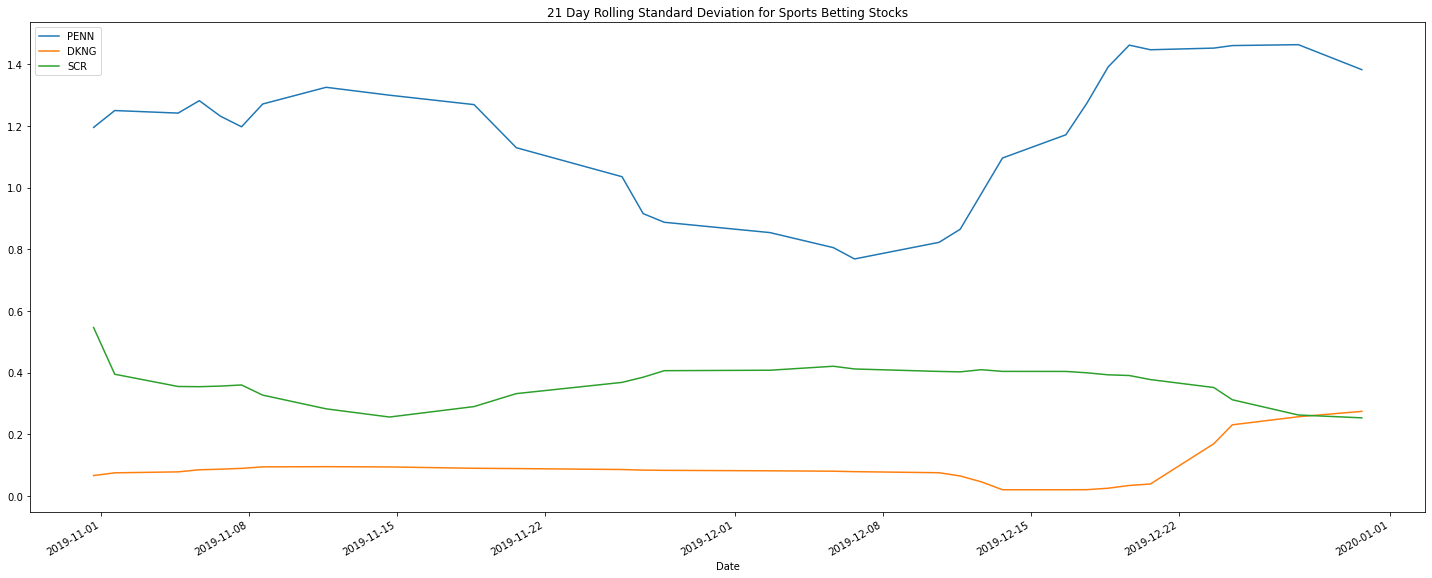

In [36]:
# Calculate rolling standard deviation

rolling_std = betting_df.rolling(window=21).std()

# Plot the rolling standard deviation

rolling_std.plot(figsize=(25,10), title="21 Day Rolling Standard Deviation for Sports Betting Stocks")


### Calculate and plot the correlation

<AxesSubplot:>

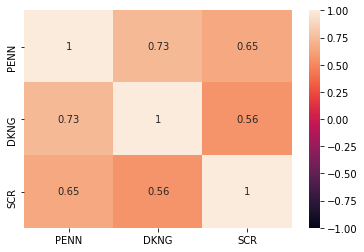

In [37]:
# Calculate and plot the correlation

correlation = betting_df.corr()
correlation

# Display de correlation matrix

sns.heatmap(correlation, vmin=-1, vmax=1, annot=True,)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [38]:
# Calculate and plot Beta

betting_covariance = betting_daily_returns.rolling(window=60).cov(combined_df["TSX 60"])

# Calculate variance of S&P TSX

variance_60 = combined_df["TSX 60"].rolling(window=60).var()

# Computing beta

betting_beta = betting_covariance / variance_60

# Plot beta trend


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [39]:
# Calculate Annualzied Sharpe Ratios

sharpe_ratios_v2 = (betting_daily_returns.mean() * 252) / (betting_daily_returns.std() * np.sqrt(252))
sharpe_ratios_v2

PENN    3.754107
DKNG    2.631342
SCR     3.181038
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

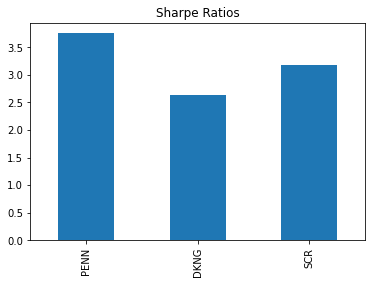

In [40]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratios_v2.plot.bar(title="Sharpe Ratios")

### How does your portfolio do?

Write your answer here!

In [41]:
# Comparitively to the other portfolios, mine does not match that of the professionals in terms of returns.  
# There are a lot of negative days and not much growth at the point in time the data was set to match.
# The stocks I picked are ones that I am interested in now as sports betting is becoming legalized in North America,
# but the data I needed to get for this was before then and not a great representation.  